<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week6/EvidenceBasedInvesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on the Monte Carlo Simulation notebook developed by Matt Macarty


In [0]:
# Install base libraries

import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots
from babel.numbers import format_currency

plots.style.use('fivethirtyeight')


In [42]:
# OBTAIN - Build Base Investment and Calculate Growth

pv = 10000
time_horizon = 30
i =.07
additions = 10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(format_currency(ending, 'USD'))
    pv = ending

$20,700.00
$32,149.00
$44,399.43
$57,507.39
$71,532.91
$86,540.21
$102,598.03
$119,779.89
$138,164.48
$157,835.99
$178,884.51
$201,406.43
$225,504.88
$251,290.22
$278,880.54
$308,402.17
$339,990.33
$373,789.65
$409,954.92
$448,651.77
$490,057.39
$534,361.41
$581,766.71
$632,490.38
$686,764.70
$744,838.23
$806,976.91
$873,465.29
$944,607.86
$1,020,730.41


In [43]:
# OBTAIN - Using random variation based on market history - 7.10% - S&P 500


pv = 10000
expected_return = .071
volatility = .10
time_horizon = 30
annual_addition = 10000

#print("\tEnding Value".rjust(9))
print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(format_currency(fv, 'USD')))
    #print(format_currency(fv, 'USD') )
    pv = fv

	Return     		Ending Value
	0.0317               	$20,317.41
	0.0557               	$31,449.76
	0.1098               	$44,903.96
	-0.0765               	$51,470.68
	0.1252               	$67,912.60
	0.1107               	$85,432.10
	0.081               	$102,351.21
	0.0399               	$116,434.46
	0.0235               	$129,170.87
	0.1704               	$161,175.75
	0.0769               	$183,576.78
	-0.0793               	$179,016.29
	0.1084               	$208,418.07
	0.0507               	$228,975.08
	0.0924               	$260,139.74
	-0.0668               	$252,770.97
	0.1886               	$310,432.06
	0.309               	$416,353.55
	-0.0343               	$412,065.00
	0.0973               	$462,145.25
	-0.0385               	$454,360.88
	0.1247               	$521,017.22
	0.3162               	$695,753.53
	0.0385               	$732,554.17
	0.1957               	$885,940.07
	0.0612               	$950,203.43
	0.0009               	$961,059.19
	-0.0252               	$946,83

In [0]:
# MODEL - Simulate Multiple Outcomes

sim = DataFrame()
iterations = 5000


for x in range(iterations):
    expected_return = .071 # Return of S&P 500 - 10 year avg
    volatility = .208 # Frequency and severity that market price fluctuates
    time_horizon = 30
    pv = 10000
    annual_investment = 10000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        
        stream.append(end)

        pv = end

    
    sim[x] = stream

In [38]:
# EXPLORE  - Look at sample of annual ending values

first_five = list(range(5))
sim[first_five]


,0,1,2,3,4
0,21436.26,22303.83,20508.78,21384.32,22129.90
1,33028.02,40100.30,32590.32,30704.21,42667.50
2,45676.00,43154.83,49532.74,28144.76,70548.24
3,57534.74,62258.92,63137.96,38688.84,86360.05
4,79129.52,101011.12,49627.41,56127.40,94456.11
5,108927.21,113801.85,69690.25,64733.97,115247.36
6,119267.79,124038.08,91561.70,95406.33,149565.31
7,122476.76,131411.46,77484.56,90640.71,186447.35
8,113486.50,179771.31,79244.46,69602.33,243710.68
9,145317.49,122066.55,99693.54,93639.21,227027.17


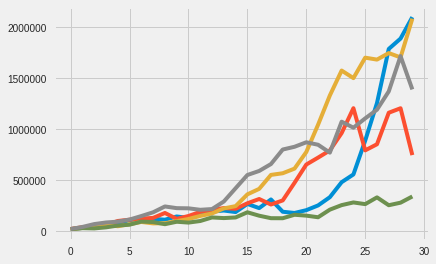

In [39]:
# EXPLORE - Plot simulated portfolios

plots.plot(sim[first_five])


In [45]:
# EXPLORE - Look at summary statistics


print("Count:", len(sim.loc[29]))
print("Mean: ", format_currency(np.mean(sim.loc[29]), 'USD'))
print("SD: ",format_currency(np.std(sim.loc[29]),'USD'))
print("Max: ",format_currency(np.max(sim.loc[29]), 'USD'))
print("Min: ", format_currency(np.min(sim.loc[29]), 'USD'))

Count: 5000
Mean:  $1,056,988.49
SD:  $1,010,828.07
Max:  $15,059,951.93
Min:  $65,030.29


In [30]:
# EXPLORE - Look at summary statistics with Pandas

ending_values = sim.loc[29]
ending_values.describe()

count    5.000000e+03
mean     7.221060e+05
std      6.257133e+05
min      5.504150e+04
25%      3.297169e+05
50%      5.345772e+05
75%      9.002735e+05
max      7.040723e+06
Name: 29, dtype: float64

(array([ 85., 258., 447., 498., 431., 441., 389., 302., 282., 238., 203.,
        158., 150., 153., 108.,  98.,  80.,  82.,  71.,  48.,  41.,  45.,
         36.,  40.,  23.,  37.,  23.,  23.,  24.,  15.,  20.,  18.,  16.,
          6.,   6.,   6.,   6.,  10.,   3.,   9.,   7.,   3.,   6.,   7.,
          4.,   1.,   6.,   1.,   3.,   1.,   3.,   2.,   1.,   1.,   1.,
          0.,   2.,   1.,   2.,   1.,   0.,   1.,   1.,   0.,   3.,   0.,
          1.,   0.,   0.,   0.,   2.,   0.,   2.,   0.,   1.,   1.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]), array([  55041.5   ,  124898.3165,  194755.133 ,  264611.9495,
         334468.766 ,  404325.5825,  474182.399 ,  544039.2155,
         613896.032 ,  683752.8485,  753609.665 ,  823466.4815,
         893323.298 ,  963180.1145, 1033036.931 , 1102893.7475,
        1172750.564 , 1242607.3805, 1312464.197 , 1382321.0135,

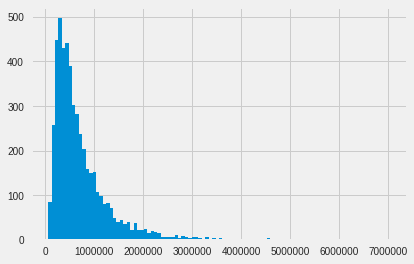

In [31]:
# EXPLORE - Look at histogram

plots.hist(ending_values, bins=100)


In [32]:
# ANALYZE - Probability of seeing specific value?

len(ending_values[ending_values<1000000]) / len(ending_values)


0.792

In [33]:
# ANALYZE - Tableof all percentiles


p_tiles = np.percentile(ending_values,[5,10,15,25,75,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15,25,75,85,90,95]
    print( "{}%-ile: ".format(l[p]).rjust(15),"{}".format(format_currency(p_tiles[p], 'USD')))

       5%-ile:  $172,712.38
      10%-ile:  $222,212.59
      15%-ile:  $258,709.43
      25%-ile:  $329,716.94
      75%-ile:  $900,273.51
      85%-ile:  $1,179,694.75
      90%-ile:  $1,424,308.36
      95%-ile:  $1,876,512.30
